# Assignment No 7 :  Text Analytics

In [78]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [80]:
from textblob import TextBlob 

In [81]:
b=TextBlob("I havv good spelling")
b.correct()

TextBlob("I have good spelling")

In [82]:
b1 = TextBlob("Beautiful is better than ugly."
              "Explicit is better than implicit." 
              "Simple is better than complex.")
b1.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly.Explicit', 'is', 'better', 'than', 'implicit.Simple', 'is', 'better', 'than', 'complex'])

In [83]:
b1.sentences

[Sentence("Beautiful is better than ugly.Explicit is better than implicit.Simple is better than complex.")]

In [84]:
b1.upper()

TextBlob("BEAUTIFUL IS BETTER THAN UGLY.EXPLICIT IS BETTER THAN IMPLICIT.SIMPLE IS BETTER THAN COMPLEX.")

In [85]:
b1.find("Simple")

63

In [86]:
animals = TextBlob("cat dog octopus")
animals.words

WordList(['cat', 'dog', 'octopus'])

In [87]:
animals.words.singularize()

WordList(['cat', 'dog', 'octopu'])

In [88]:
animals.words.pluralize()

WordList(['cats', 'dogs', 'octopodes'])

In [89]:
sen = TextBlob("We are no longer the knights who say Ni ." "We are now the knig ")
sen.word_counts['the']

2

In [90]:
sen.words.count('the')

2

In [91]:
sen.words.count('Ni', case_sensitive=True)

1

In [92]:
b = TextBlob("And now for something completely different.") 
print(b.parse())

And/CC/O/O now/RB/B-ADVP/O for/IN/B-PP/B-PNP something/NN/B-NP/I-PNP completely/RB/B-ADJP/O different/JJ/I-ADJP/O ././O/O


In [93]:
apple_blob = TextBlob('apples') 
banana_blob = TextBlob('bananas') 
apple_blob < banana_blob

True

In [94]:
blob = TextBlob("Now is better then never.") 
blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'then']),
 WordList(['better', 'then', 'never'])]

In [95]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [96]:
# Sample document
document = """
This is a sample document. It contains multiple sentences. Each sentence showcases different preprocessing techniques.
"""

In [97]:
# Tokenization
sentences = sent_tokenize(document)
tokens = [word_tokenize(sentence) for sentence in sentences]

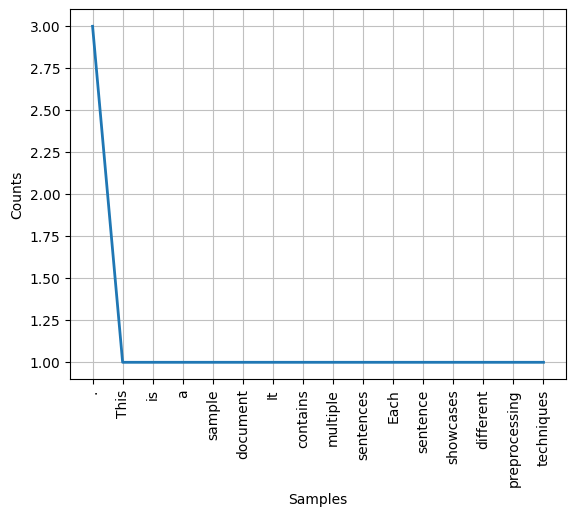

In [98]:
from nltk.probability import FreqDist 
fdist = FreqDist(word_tokenize(document))
fdist.most_common(4)
import matplotlib.pyplot as plt 
fdist.plot(30,cumulative=False) 
plt.show()

In [99]:
# POS tagging
pos_tags = [nltk.pos_tag(sentence_tokens) for sentence_tokens in tokens]

In [100]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for sentence_tokens in tokens:
    filtered_sentence = [word for word in sentence_tokens if word.lower() not in stop_words]
    filtered_tokens.append(filtered_sentence)

In [101]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [[stemmer.stem(word) for word in sentence_tokens] for sentence_tokens in filtered_tokens]

In [102]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in sentence_tokens] for sentence_tokens in filtered_tokens]

In [103]:
# Print the results
print("Tokenization:")
print(tokens)
print("POS tagging:")
print(pos_tags)
print("Stop words removal:")
print(filtered_tokens)
print("Stemming:")
print(stemmed_tokens)
print("Lemmatization:")
print(lemmatized_tokens)

Tokenization:
[['This', 'is', 'a', 'sample', 'document', '.'], ['It', 'contains', 'multiple', 'sentences', '.'], ['Each', 'sentence', 'showcases', 'different', 'preprocessing', 'techniques', '.']]
POS tagging:
[[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('document', 'NN'), ('.', '.')], [('It', 'PRP'), ('contains', 'VBZ'), ('multiple', 'JJ'), ('sentences', 'NNS'), ('.', '.')], [('Each', 'DT'), ('sentence', 'NN'), ('showcases', 'VBZ'), ('different', 'JJ'), ('preprocessing', 'VBG'), ('techniques', 'NNS'), ('.', '.')]]
Stop words removal:
[['sample', 'document', '.'], ['contains', 'multiple', 'sentences', '.'], ['sentence', 'showcases', 'different', 'preprocessing', 'techniques', '.']]
Stemming:
[['sampl', 'document', '.'], ['contain', 'multipl', 'sentenc', '.'], ['sentenc', 'showcas', 'differ', 'preprocess', 'techniqu', '.']]
Lemmatization:
[['sample', 'document', '.'], ['contains', 'multiple', 'sentence', '.'], ['sentence', 'showcase', 'different', 'preprocessing', 't

In [104]:
# Term frequency calculation
from nltk.probability import FreqDist
tf = FreqDist(token for sentence_tokens in tokens for token in sentence_tokens)
tf.most_common()

[('.', 3),
 ('This', 1),
 ('is', 1),
 ('a', 1),
 ('sample', 1),
 ('document', 1),
 ('It', 1),
 ('contains', 1),
 ('multiple', 1),
 ('sentences', 1),
 ('Each', 1),
 ('sentence', 1),
 ('showcases', 1),
 ('different', 1),
 ('preprocessing', 1),
 ('techniques', 1)]

In [105]:
# Inverse Document Frequency (IDF) calculation
from sklearn.feature_extraction.text import TfidfVectorizer
tokens = word_tokenize(document)
corpus = [' '.join(tokens)]
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
idf = vectorizer.idf_
print("Inverse Document Frequency (IDF):")
print(dict(zip(vectorizer.get_feature_names_out(), idf)))

Inverse Document Frequency (IDF):
{'contains': 1.0, 'different': 1.0, 'document': 1.0, 'each': 1.0, 'is': 1.0, 'it': 1.0, 'multiple': 1.0, 'preprocessing': 1.0, 'sample': 1.0, 'sentence': 1.0, 'sentences': 1.0, 'showcases': 1.0, 'techniques': 1.0, 'this': 1.0}
